In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [48]:
df=pd.read_csv("C:/Users/kunjd/Desktop/Predicitive_Demand_Forecasting/36/dataset/Final_csv.csv").sample(n = 50000)

In [49]:
df

,purchase_date,region,product_id,frequency
570141,2020-07-02,689695,527b8c83-0aea-4320-886c-f50748b4d58f,1
1002752,2020-10-10,122001,65d84e95-78e5-4b56-8484-7197b7abfd68,6
1461249,2020-12-27,403105,2dd775ed-676e-4c2b-a35b-02414bf67a76,25
3705910,2022-06-04,609001,49300188-2101-42ab-95cc-3261926c62b8,4
617796,2020-07-14,689695,f572e2e9-c0b9-4797-a5b9-7c4ea7794185,7
...,...,...,...,...
2605216,2021-08-28,560001,4d46e224-c05f-4339-93d9-68705c52251d,14
2732107,2021-09-26,410301,ec399ae9-a3fa-4253-959a-f14e27ec109d,5
823208,2020-08-31,452001,a5200020-42a1-49dd-9eb3-9a9ffb6f18d0,17
3375001,2022-01-20,609001,c234b481-abad-4a67-8030-28cf33399c9e,5


In [50]:
df

,purchase_date,region,product_id,frequency
570141,2020-07-02,689695,527b8c83-0aea-4320-886c-f50748b4d58f,1
1002752,2020-10-10,122001,65d84e95-78e5-4b56-8484-7197b7abfd68,6
1461249,2020-12-27,403105,2dd775ed-676e-4c2b-a35b-02414bf67a76,25
3705910,2022-06-04,609001,49300188-2101-42ab-95cc-3261926c62b8,4
617796,2020-07-14,689695,f572e2e9-c0b9-4797-a5b9-7c4ea7794185,7
...,...,...,...,...
2605216,2021-08-28,560001,4d46e224-c05f-4339-93d9-68705c52251d,14
2732107,2021-09-26,410301,ec399ae9-a3fa-4253-959a-f14e27ec109d,5
823208,2020-08-31,452001,a5200020-42a1-49dd-9eb3-9a9ffb6f18d0,17
3375001,2022-01-20,609001,c234b481-abad-4a67-8030-28cf33399c9e,5


In [51]:
df["purchase_date"] = pd.DatetimeIndex(df["purchase_date"])
df.dtypes

purchase_date    datetime64[ns]
region                    int64
product_id               object
frequency                 int64
dtype: object

In [52]:
df = df.rename(columns={"purchase_date": "ds", "region": "y"})

In [53]:
my_model = Prophet(interval_width=0.95)

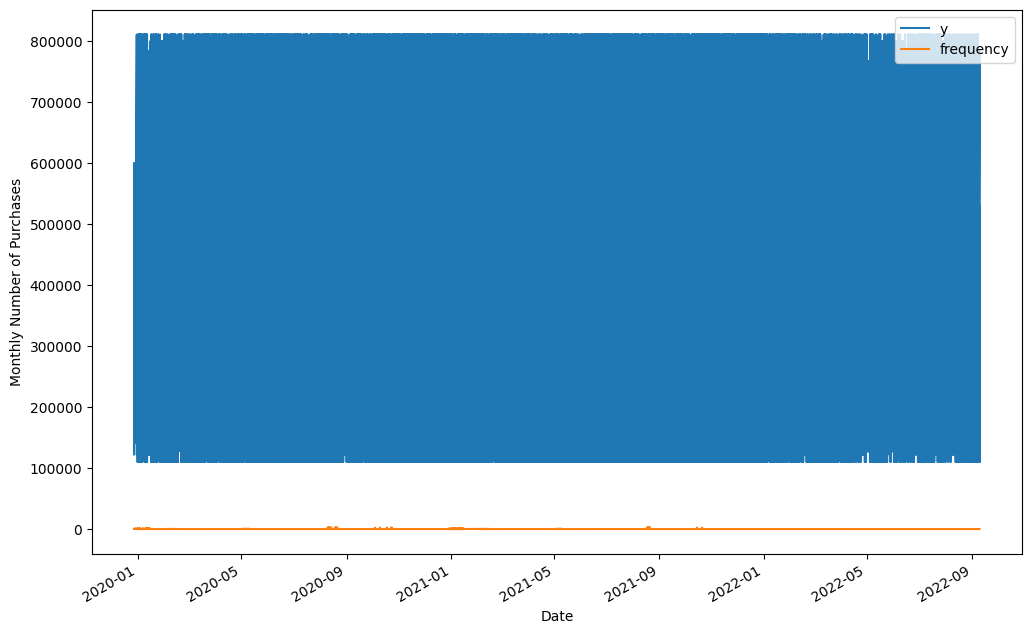

In [54]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Purchases')
ax.set_xlabel('Date')

plt.show()

In [55]:
my_model.fit(df)

10:00:21 - cmdstanpy - INFO - Chain [1] start processing
10:00:28 - cmdstanpy - INFO - Chain [1] done processing


In [56]:
future_dates = my_model.make_future_dataframe(periods=24, freq='MS')
future_dates.head()

,ds
0,2019-12-28
1,2019-12-29
2,2019-12-30
3,2019-12-31
4,2020-01-01


In [57]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2019-12-28,464950.040771,1566.202645,916111.775741
1,2019-12-29,470592.025788,47309.684893,888887.516475
2,2019-12-30,463824.178899,17382.320375,918338.894889
3,2019-12-31,472437.966852,33268.217070,909139.775003
4,2020-01-01,466443.805793,58088.624887,878178.721302


c:\Users\kunjd\Anaconda3\envs\kidney\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\kunjd\Anaconda3\envs\kidney\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


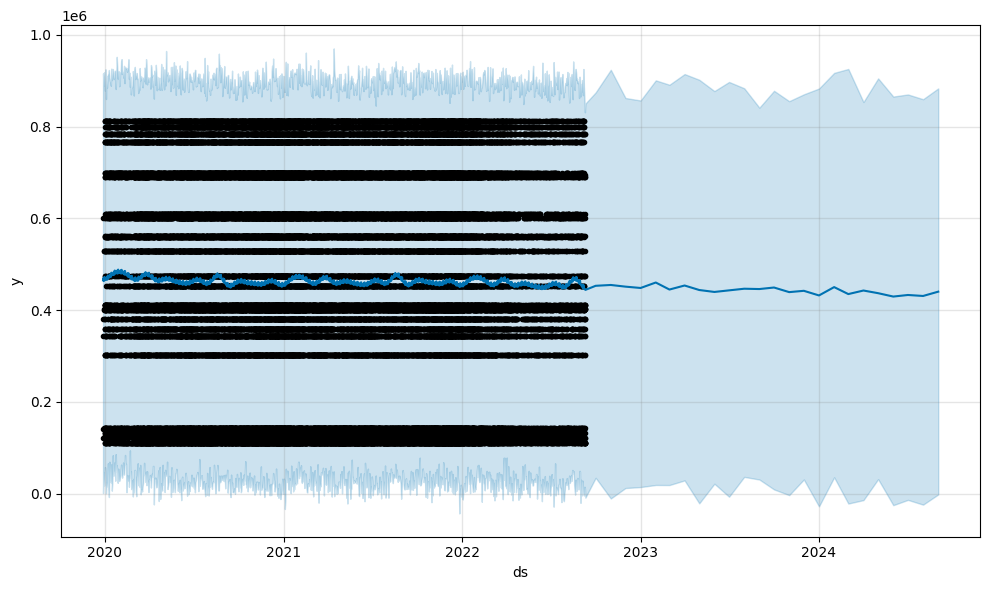

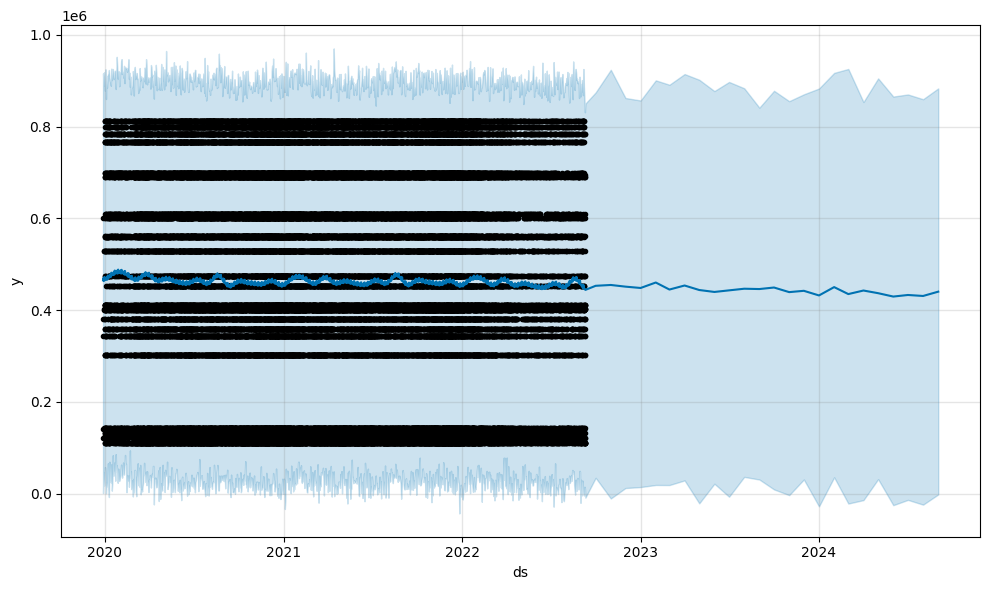

In [58]:
my_model.plot(forecast, uncertainty=True)

c:\Users\kunjd\Anaconda3\envs\kidney\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\kunjd\Anaconda3\envs\kidney\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\kunjd\Anaconda3\envs\kidney\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. 

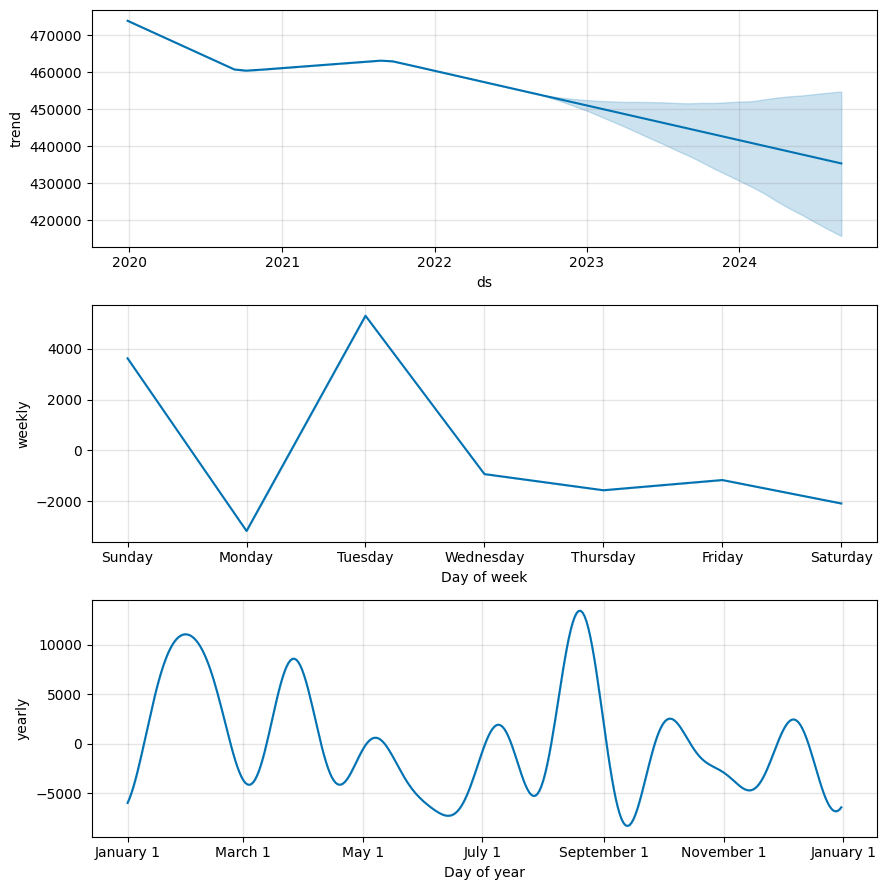

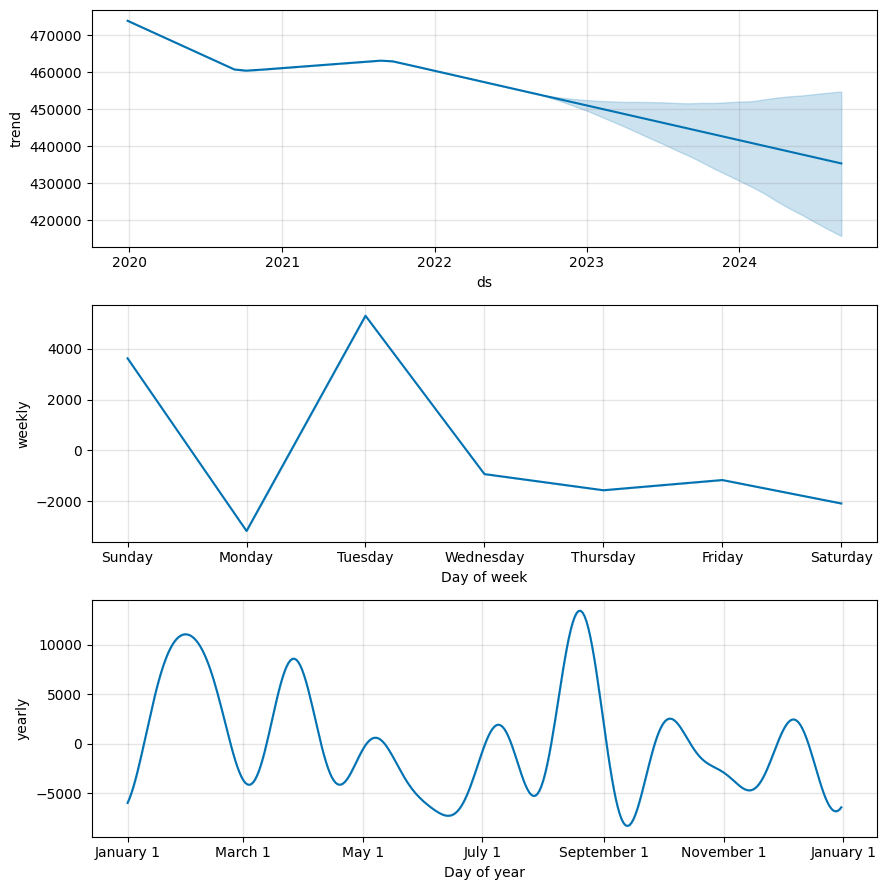

In [59]:
my_model.plot_components(forecast)

c:\Users\kunjd\Anaconda3\envs\kidney\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\kunjd\Anaconda3\envs\kidney\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\kunjd\Anaconda3\envs\kidney\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. 

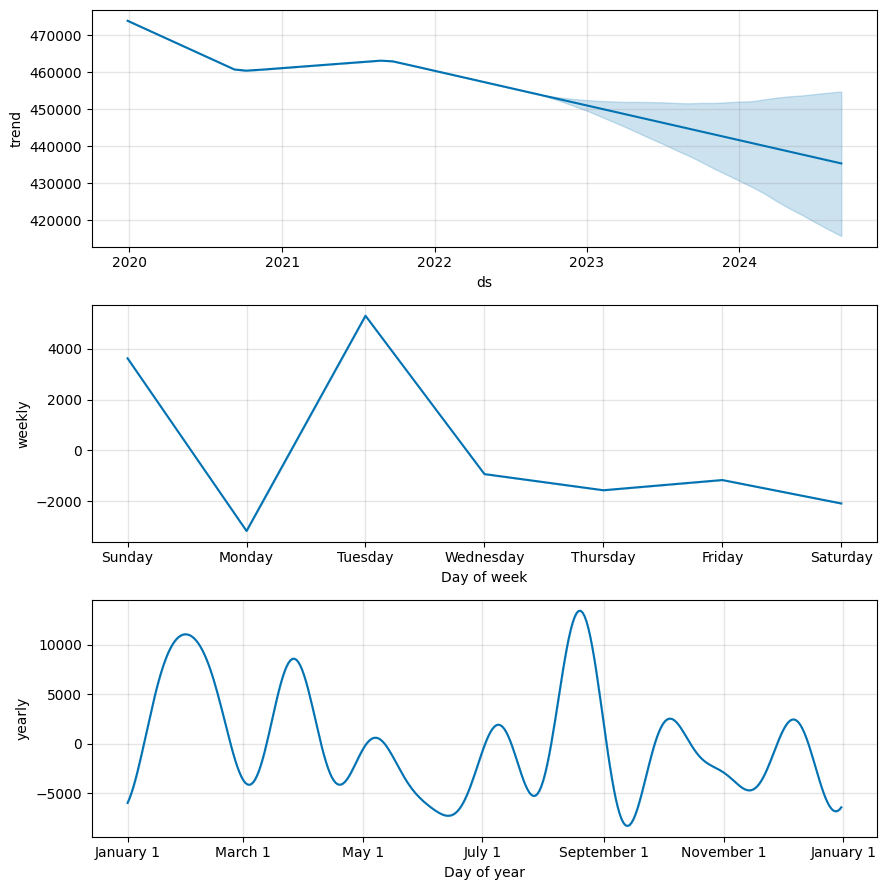

In [60]:
fig1 = my_model.plot_components(forecast)

In [61]:
from prophet.plot import add_changepoints_to_plot

c:\Users\kunjd\Anaconda3\envs\kidney\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\kunjd\Anaconda3\envs\kidney\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


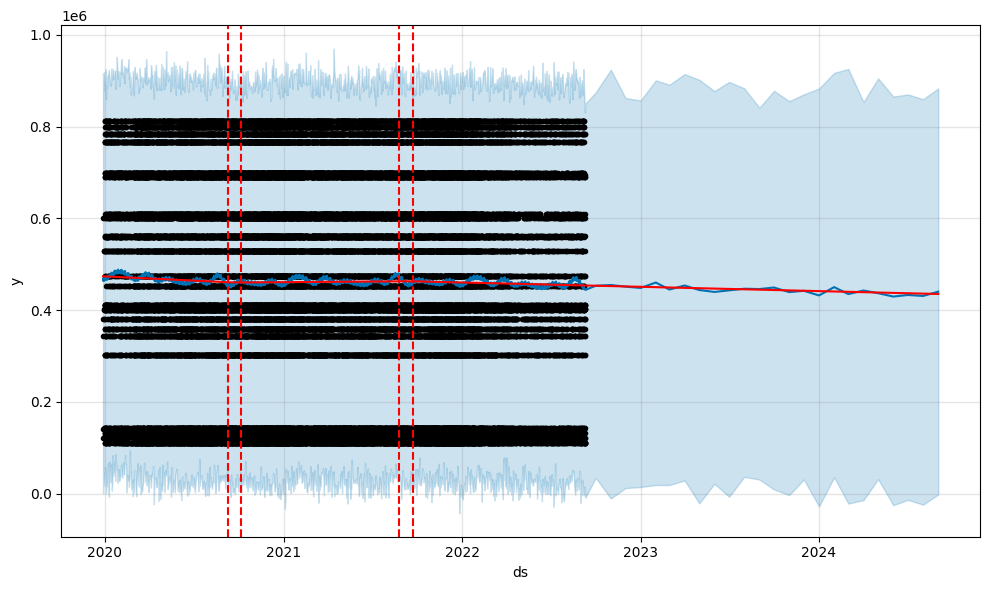

In [62]:
fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)


In [63]:
my_model.changepoints

1600    2020-03-05
3200    2020-04-08
4800    2020-05-15
6400    2020-06-16
8000    2020-07-13
9600    2020-08-11
11200   2020-09-09
12800   2020-10-06
14400   2020-10-31
16000   2020-11-21
17600   2020-12-10
19200   2020-12-30
20799   2021-01-19
22399   2021-02-10
23999   2021-03-11
25599   2021-04-06
27199   2021-05-04
28799   2021-05-31
30399   2021-06-27
31999   2021-07-27
33599   2021-08-24
35199   2021-09-22
36799   2021-10-18
38399   2021-11-09
39999   2021-11-29
Name: ds, dtype: datetime64[ns]

In [64]:
pro_change = Prophet(n_changepoints=20)
forecast = pro_change.fit(df).predict(future_dates)
print(forecast)

10:00:34 - cmdstanpy - INFO - Chain [1] start processing
10:00:42 - cmdstanpy - INFO - Chain [1] done processing


             ds          trend     yhat_lower     yhat_upper    trend_lower  \
0    2019-12-28  474997.300151  154303.331040  744123.257916  474997.300151   
1    2019-12-29  474940.083968  196348.975140  764302.853603  474940.083968   
2    2019-12-30  474882.867785  187842.773925  769615.996294  474882.867785   
3    2019-12-31  474825.651602  200800.403669  778512.773377  474825.651602   
4    2020-01-01  474768.435419  187260.721973  755267.252125  474768.435419   
...         ...            ...            ...            ...            ...   
1007 2024-05-01  435185.198462  163536.343157  744962.030316  423199.128471   
1008 2024-06-01  434261.547415  138681.728377  726353.693976  421289.630829   
1009 2024-07-01  433367.691563  130956.205412  719783.158994  419261.690286   
1010 2024-08-01  432444.040516  152105.605994  715242.128538  417269.377341   
1011 2024-09-01  431520.389469  166244.964243  729031.766179  415330.495767   

        trend_upper  additive_terms  additive_terms